In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
xtrain = train_datagen.flow_from_directory('/content//drive/MyDrive/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


IMAGE AUGMENTATION

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

CNN MODEL

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

COMPILE THE MODEL

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

SAVE THE MODEL

In [16]:
model.save('Flower.h5')

TEST THE MODEL

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [18]:
img = image.load_img('/content/drive/MyDrive/flowers/dandelion/10043234166_e6dd915111_n.jpg',target_size=(64,64))

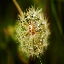

In [19]:
img

In [20]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[ 3.,  6.,  0.],
        [ 8.,  9.,  1.],
        [ 7.,  8.,  0.],
        ...,
        [35., 44.,  1.],
        [35., 44.,  1.],
        [35., 43.,  2.]],

       [[ 5.,  8.,  1.],
        [ 6.,  7.,  0.],
        [ 6.,  7.,  1.],
        ...,
        [30., 36.,  0.],
        [30., 38.,  0.],
        [31., 39.,  0.]],

       [[ 7.,  8.,  2.],
        [ 7.,  8.,  2.],
        [ 5.,  8.,  0.],
        ...,
        [19., 22.,  1.],
        [19., 24.,  1.],
        [23., 29.,  3.]],

       ...,

       [[17., 20.,  1.],
        [23., 27.,  2.],
        [24., 30.,  2.],
        ...,
        [23., 27.,  0.],
        [23., 29.,  1.],
        [21., 27.,  1.]],

       [[16., 19.,  0.],
        [23., 28.,  0.],
        [26., 31.,  1.],
        ...,
        [19., 23.,  0.],
        [25., 27.,  5.],
        [19., 24.,  1.]],

       [[17., 20.,  1.],
        [22., 26.,  0.],
        [26., 31.,  1.],
        ...,
        [18., 21.,  0.],
        [20., 24.,  1.],
        [21., 25.,  2.]]

In [21]:
# Expanding dimensions

x = np.expand_dims(x,axis=0)
x

array([[[[ 3.,  6.,  0.],
         [ 8.,  9.,  1.],
         [ 7.,  8.,  0.],
         ...,
         [35., 44.,  1.],
         [35., 44.,  1.],
         [35., 43.,  2.]],

        [[ 5.,  8.,  1.],
         [ 6.,  7.,  0.],
         [ 6.,  7.,  1.],
         ...,
         [30., 36.,  0.],
         [30., 38.,  0.],
         [31., 39.,  0.]],

        [[ 7.,  8.,  2.],
         [ 7.,  8.,  2.],
         [ 5.,  8.,  0.],
         ...,
         [19., 22.,  1.],
         [19., 24.,  1.],
         [23., 29.,  3.]],

        ...,

        [[17., 20.,  1.],
         [23., 27.,  2.],
         [24., 30.,  2.],
         ...,
         [23., 27.,  0.],
         [23., 29.,  1.],
         [21., 27.,  1.]],

        [[16., 19.,  0.],
         [23., 28.,  0.],
         [26., 31.,  1.],
         ...,
         [19., 23.,  0.],
         [25., 27.,  5.],
         [19., 24.,  1.]],

        [[17., 20.,  1.],
         [22., 26.,  0.],
         [26., 31.,  1.],
         ...,
         [18., 21.,  0.],
        

In [22]:
model.predict(x)

array([[8.1779763e-02, 9.1822016e-01, 2.1105427e-24, 1.6366634e-27]],
      dtype=float32)

In [25]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'

In [26]:
# Testing

img = image.load_img('/content/drive/MyDrive/flowers/daisy/1031799732_e7f4008c03.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'